In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'figure.figsize': (5.0, 3.0)}

df = pd.read_csv("diamonds.csv")

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='carat', ylabel='price'>

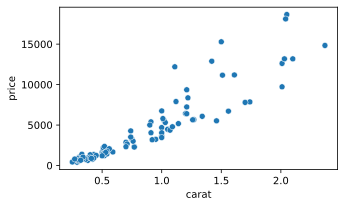

In [12]:
sns.scatterplot(x = "carat", y = "price", data = df.sample(100))

In [13]:
# x und y Werte müssen vor Eingabe zunächst umgeformt werden
xs = df["carat"].to_numpy().reshape(-1, 1)
print(xs.shape)
print(xs)

(53940, 1)
[[0.23]
 [0.21]
 [0.23]
 ...
 [0.7 ]
 [0.86]
 [0.75]]


In [14]:
ys = df["price"].to_numpy()
print(ys.shape)

(53940,)


In [15]:
#Klasse Linear Regression kommt aus sklearn
model = LinearRegression()
#fit trainiert das Modell mit den vorher umgeformten Daten
model.fit(xs, ys)
#Der Unterstrich bedeutet, dass diese Attribute von dem ML Prozess erzeugt wurden
print(model.coef_)
print(model.intercept_)
#Die Werte können nun in eine Lineare Gleichung eingesetzt werden, 
#die den Preis eines Diamanten basierend auf x, dem Gewicht, gerechnet
print(model.coef_ * 1 + model.intercept_)
print(7756 * 1 + -2256)

[7756.42561797]
-2256.360580045342
[5500.06503792]
5500


In [16]:
#.predict() Kann verwendet werden, um das Modell mit verschiedenen Werten zu testen
model.predict(np.array([
    [10],
    [5],
]))

array([75307.89559964, 36525.7675098 ])

<AxesSubplot:xlabel='carat', ylabel='price'>

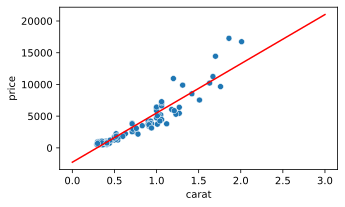

In [17]:
x_pred = np.array([3,0])

y_pred = model.predict(x_pred.reshape(-1,1))

ax = sns.lineplot(x=x_pred, y=y_pred, color = "red")
sns.scatterplot(x = "carat", y = "price", data = df.sample(100), ax = ax)

In [19]:
#Bestimmtheitsmaß R^2 gibt an, wie gut unser Modell verglichen mit einer Vorhersage funktioniert, 
#die immer den Mittelwert der Daten vorhersagt
from sklearn.metrics import r2_score
y_pred = model.predict(xs)
r2_score(ys, y_pred)

 

0.8493305264354858

In [20]:
print(model.score(xs,ys))

0.8493305264354858
